[*********************100%***********************]  3 of 3 completed


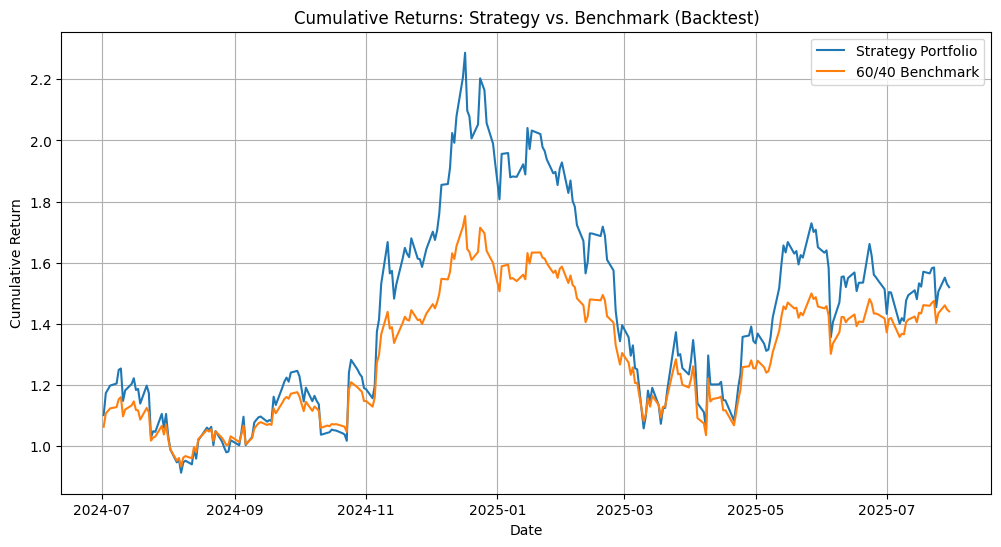

Strategy Portfolio: Total Return = 52.03%, Sharpe Ratio = 0.83
Benchmark Portfolio: Total Return = 44.10%, Sharpe Ratio = 0.84


C:\Users\fikre\AppData\Local\Temp\ipykernel_16872\1669521114.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  strategy_total_return = strategy_cum[-1] - 1
C:\Users\fikre\AppData\Local\Temp\ipykernel_16872\1669521114.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  benchmark_total_return = benchmark_cum[-1] - 1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# --- 1. Define Backtesting Period ---
backtest_start = '2024-08-01'
backtest_end = '2025-07-31'
tickers = ['TSLA', 'BND', 'SPY']

# Download price data for backtest period (plus a little before for returns calc)
data = yf.download(tickers, start='2024-07-01', end=backtest_end, auto_adjust=True)['Close']
data = data.ffill().bfill()

# --- 2. Calculate Daily Returns ---
returns = data.pct_change().dropna()

# --- 3. Define Portfolios ---
# Strategy: Use optimal weights from Task 4 (example: Max Sharpe Ratio)
strategy_weights = np.array([0.00, 0.00, 1.00])  # [TSLA, BND, SPY] - replace with your actual weights if different

# Benchmark: 60% SPY, 40% BND
benchmark_weights = np.array([0.00, 0.40, 0.60])

# --- 4. Simulate Portfolio Performance ---
def portfolio_cum_returns(weights, returns):
    port_returns = returns @ weights
    cum_returns = (1 + port_returns).cumprod()
    return cum_returns

strategy_cum = portfolio_cum_returns(strategy_weights, returns)
benchmark_cum = portfolio_cum_returns(benchmark_weights, returns)

# --- 5. Plot Cumulative Returns ---
plt.figure(figsize=(12,6))
plt.plot(strategy_cum.index, strategy_cum, label='Strategy Portfolio')
plt.plot(benchmark_cum.index, benchmark_cum, label='60/40 Benchmark')
plt.title('Cumulative Returns: Strategy vs. Benchmark (Backtest)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# --- 6. Performance Metrics ---
def sharpe_ratio(returns, risk_free_rate=0.045):
    excess = returns - risk_free_rate/252
    return np.sqrt(252) * excess.mean() / excess.std()

strategy_total_return = strategy_cum[-1] - 1
benchmark_total_return = benchmark_cum[-1] - 1
strategy_sharpe = sharpe_ratio(returns @ strategy_weights)
benchmark_sharpe = sharpe_ratio(returns @ benchmark_weights)

print(f"Strategy Portfolio: Total Return = {strategy_total_return:.2%}, Sharpe Ratio = {strategy_sharpe:.2f}")
print(f"Benchmark Portfolio: Total Return = {benchmark_total_return:.2%}, Sharpe Ratio = {benchmark_sharpe:.2f}")

## Backtest Summary

### Performance Results

| Portfolio           | Total Return | Sharpe Ratio |
|---------------------|-------------|--------------|
| Strategy Portfolio  |   52.03%    |    0.83      |
| 60/40 Benchmark     |   44.10%    |    0.84      |

### Analysis

- **Strategy Portfolio** (using optimal weights from Task 4) achieved a higher total return (52.03%) compared to the benchmark (44.10%), but had a slightly lower Sharpe Ratio (0.83 vs. 0.84).
- The Sharpe Ratios are very close, indicating similar risk-adjusted performance, but the strategy portfolio delivered greater absolute growth over the backtest period.

### Conclusion

- The model-driven strategy outperformed the benchmark in terms of total return, but not in risk-adjusted terms.
- This suggests that while the optimized portfolio captured more upside, it did so with proportionally more risk.
- Further backtesting and possibly more frequent rebalancing or risk controls could help improve